<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/Reto1_Caracterizaci%C3%B3n_Variables_Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 1 - Caracterización y Muestreo de Variables Aleatorias

*David Ospina Muñoz*

Una empresa del sector asegurador ha creado una base de datos de eventos de pérdidas asociado con la administración y la ejecución asociado con los procesos de la organización. De acuerdo con la base de datos, la empresa quiere llevar a cabo la caracterización de la distribución agregada de sus pérdidas. Para la caracterización de la distribución agregada de pérdidas es necesario tener en cuenta las siguientes métricas:

* Error asociado con la muestra de los datos. (Tamaño de la Muestra).

* Media

* Varianza

* Coeficiente de Asimetría

* Coeficiente de Kurtosis

* Llevar a cabo el proceso de muestreo aleatorio de la variable a una confiabilidad del 99.9% según los acuerdos de Basilea mediante la utilización del método de Montecarlo.


0. Cargar las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Cargar el archivo


In [ ]:
nxl = '/content/1. AdmonEjecProcesos.xlsx'

2. Seleccionamos las variables de interés y calculamos las pérdidas

In [ ]:
#Cargamos los datos iniciales (n=350)

XDB = pd.read_excel(nxl, sheet_name=0)
XDB.head(100) #Mostrar los primeros 100 datos

#Tomamos las variables de interés
Xev=XDB.iloc[:,3] #Variable Eventos Semanales
Xsev=XDB.iloc[:,4] #Pérdidas promedio por Evento
LDA=np.multiply(Xev,Xsev) #Multiplicamos las variables

,0
0,0.395144
1,0.148815
2,0.349362
3,0.107869
4,0.819804
...,...
345,0.578173
346,0.108817
347,3.487451
348,0.048614


In [ ]:
#Cargamos los datos muestreados (n=1000)
XDB_muestreo = pd.read_excel(nxl, sheet_name=4)
XDB_muestreo.head(100) #Mostrar los primeros 100 datos

#Tomamos las variables de interés
Xev_muestreo=XDB_muestreo.iloc[:,0] #Variable Eventos Semanales
Xsev_muestreo=XDB_muestreo.iloc[:,1] #Pérdidas promedio por Evento
LDA_muestreo=np.multiply(Xev_muestreo,Xsev_muestreo) #Multiplicamos las variables

,0
0,0.899455
1,0.200739
2,0.261069
3,1.418771
4,0.081846
...,...
995,2.120384
996,0.082327
997,0.295706
998,0.564789


3. Se procede a graficar las pérdidas

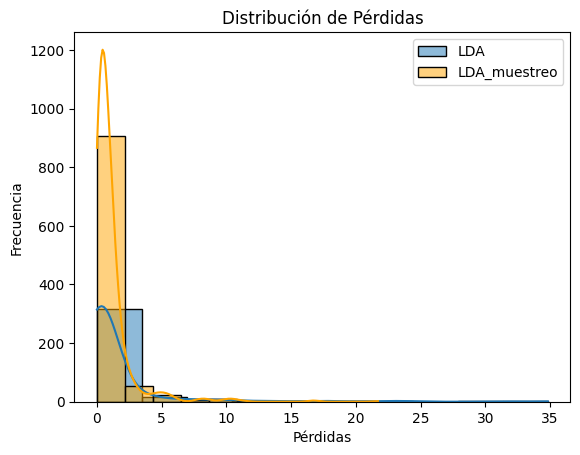

In [ ]:
#Gráficamos la Distribución de las Pérdidas
plt.figure()
sns.histplot(LDA, kde=True, bins=10, label='LDA')
sns.histplot(LDA_muestreo, kde=True, bins=10, label='LDA_muestreo', color='orange')
plt.title('Distribución de Pérdidas')
plt.xlabel('Pérdidas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as stats

#Calculamos la curtosis y el coeficiente de asimetría para LDA
kurtosis_lda = stats.kurtosis(LDA)
asimetria_lda = stats.skew(LDA)

#Calculamos la curtosis y el coeficiente de asimetría para LDA_muestreo
kurtosis_lda_muestreo = stats.kurtosis(LDA_muestreo)
asimetria_lda_muestreo = stats.skew(LDA_muestreo)

#Calculamos las variaciones
kurtosis_variacion = ((kurtosis_lda_muestreo - kurtosis_lda)/kurtosis_lda)*100
asimetria_variacion = ((asimetria_lda_muestreo - asimetria_lda)/asimetria_lda)*100

print("Curtosis de LDA:", kurtosis_lda)
print("Coeficiente de asimetría de LDA:", asimetria_lda)
print("Curtosis de LDA_muestreo:", kurtosis_lda_muestreo)
print("Coeficiente de asimetría de LDA_muestreo:", asimetria_lda_muestreo)
print("Variación de la curtosis:", kurtosis_variacion, '%')
print("Variación del coeficiente de asimetría:", asimetria_variacion, '%')

Curtosis de LDA: 29.643693069779438
Coeficiente de asimetría de LDA: 5.059212525816747
Curtosis de LDA_muestreo: 41.07048459541037
Coeficiente de asimetría de LDA_muestreo: 5.366346198073022
Variación de la curtosis: 38.5471253488321 %
Variación del coeficiente de asimetría: 6.070780199270084 %


4. Caracterización de la distribución agregada de pérdidas

In [ ]:
#Para los datos originales
counts,bin_edges=np.histogram(LDA,bins=10)
print(counts)    #Cuantos datos hay por intervalo
print(bin_edges) #Límites de los intervalos

#Para los datos muestreados
counts_m,bin_edges_m=np.histogram(LDA_muestreo,bins=10)
print(counts_m)    #Cuantos datos hay por intervalo
print(bin_edges_m) #Límites de los intervalos


#Los valores centrales - marcas de clase para los datos originales
mc=(bin_edges[1:]+bin_edges[:-1])/2
#Límites inferiores bin_edges[:-1]
#Límites superiores bin_edges[1:]
print("Los valores centrales de las clases para los datos originales son:\n",mc)


#Los valores centrales - marcas de clase para los datos muestreados
mc_muestreo=(bin_edges_m[1:]+bin_edges_m[:-1])/2
#Límites inferiores bin_edges[:-1]
#Límites superiores bin_edges[1:]
print("Los valores centrales de las clases para los datos muestreados son:\n",mc_muestreo)


#Cuantos datos hay por intervalo (n=350)
fp=counts/sum(counts)
print("Los datos originales por intervalo son:\n",fp)

#Cuantos datos hay por intervalo (n=1000)
fp_m=counts_m/sum(counts_m)
print("Los datos muestreados por intervalo son:\n",fp_m)

[315  15   8   4   1   2   3   0   1   1]
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057 34.82215619]
[906  52  24   6   8   1   0   2   0   1]
[3.18907101e-04 2.16987975e+00 4.33944060e+00 6.50900144e+00
 8.67856229e+00 1.08481231e+01 1.30176840e+01 1.51872448e+01
 1.73568057e+01 1.95263665e+01 2.16959274e+01]
Los valores centrales de las clases para los datos originales son:
 [ 1.74110781  5.22332343  8.70553905 12.18775467 15.66997029 19.15218591
 22.63440152 26.11661714 29.59883276 33.08104838]
Los valores centrales de las clases para los datos muestreados son:
 [ 1.08509933  3.25466017  5.42422102  7.59378186  9.76334271 11.93290355
 14.1024644  16.27202524 18.44158609 20.61114693]
Los datos originales por intervalo son:
 [0.9        0.04285714 0.02285714 0.01142857 0.00285714 0.00571429
 0.00857143 0.         0.00285714 0.00285714]
Los datos muestreados por intervalo son:
 [0.906 0.052 0.024 0.006 0.008 0.0

In [ ]:
#Se procede con el cálculo de las medidas de tendencia central: Media, varianza,coeficiente de asimetría, Kurtosis

#Para los datos originales
u=np.sum(np.multiply(mc,fp))
print("La media de los datos originales es:",u)

#Para los datos muestreados
u_muestreo=np.sum(np.multiply(mc_muestreo,fp_m))
print("La media de los datos muestreados es:",u_muestreo)

La media de los datos originales es: 2.656433058055811
La media de los datos muestreados es: 1.4712811597683224


In [ ]:
#Desviación estándar - varianza #Para los datos originales
var=np.sum(np.multiply(np.power(mc-u,2),fp)) #(mc-u)**2
print("La varianza de los datos es:",var)
std=np.sqrt(var)
print("La desviación estándar de los datos es:",std)

#Desviación estándar - varianza #Para los datos muestreados
var_muestreo=np.sum(np.multiply(np.power(mc_muestreo-u_muestreo,2),fp_m))
print("La varianza de los datos muestreados es:",var_muestreo)
std_muestreo=np.sqrt(var_muestreo)
print("La desviación estándar de los datos muestreados es:",std_muestreo)

#Coeficiente de asimetría #Datos originales
cas=np.sum(np.multiply(np.power((mc-u)/std,3),fp))
print("El coeficiente de asimetría de los datos es:",cas)

#Coeficiente de asimetría #Datos muestreados
cas_muestreo=np.sum(np.multiply(np.power((mc_muestreo-u_muestreo)/std_muestreo,3),fp_m))
print("El coeficiente de asimetría de los datos muestreados es:",cas_muestreo)

#Kurtosis #Datos originales
kur=np.sum(np.multiply(np.power((mc-u)/std,4),fp))
kur=kur-3
print("La kurtosis de los datos es:",kur)

#Kurtosis #Datos muestreados
kur_muestreo=np.sum(np.multiply(np.power((mc_muestreo-u_muestreo)/std_muestreo,4),fp_m))
kur_muestreo=kur_muestreo-3
print("La kurtosis de los datos muestreados es:",kur_muestreo)

La varianza de los datos es: 13.089556542674002
La desviación estándar de los datos es: 3.6179492178130417
La varianza de los datos muestreados es: 2.3643985280054745
La desviación estándar de los datos muestreados es: 1.5376600820745379
El coeficiente de asimetría de los datos es: 5.313307467317224
El coeficiente de asimetría de los datos muestreados es: 6.134959143861931
La kurtosis de los datos es: 31.735556826670006
La kurtosis de los datos muestreados es: 49.73595428100957


In [ ]:
#Error asociado con la muestra de los datos originales
n = len(LDA)
print("El tamaño de la muestra es:",n)
Z = 2
p = 0.955
#Error asociado con la muestra de los datos muestreados
n_muestreo = len(LDA_muestreo)
print("El tamaño de la muestra es:",n_muestreo)
Z = 2
p = 0.955

El tamaño de la muestra es: 350
El tamaño de la muestra es: 1000


In [ ]:
e = np.sqrt((Z**2 * p * (1-p)) / n)
print("El error asociado con la muestra de los datos originales es:",e)
e_muestreo = np.sqrt((Z**2 * p * (1-p)) / n_muestreo)
print("El error asociado con la muestra de los datos muestreados es:",e_muestreo)

El error asociado con la muestra de los datos originales es: 0.022161743098024975
El error asociado con la muestra de los datos muestreados es: 0.0131110640300473


In [ ]:
#Variación de la media por el error asociado con la muestra

#En los datos originales (n=350)
LI = u - e
print("El límite inferior de la media es:",LI)
LS = u + e
print("El límite superior de la media es:",LS)

#En los datos muestreados (n=1000)
LI_muestreo = u_muestreo - e_muestreo
print("El límite inferior de la media de los datos muestreados es:",LI_muestreo)
LS_muestreo = u_muestreo + e_muestreo
print("El límite superior de la media de los datos muestreados es:",LS_muestreo)

El límite inferior de la media es: 2.634271314957786
El límite superior de la media es: 2.678594801153836
El límite inferior de la media de los datos muestreados es: 1.458170095738275
El límite superior de la media de los datos muestreados es: 1.4843922237983698


# Análisis de resultados 📊

En la base de datos original (hoja Admon Ejecución Procesos en el archivo de excel), se tiene un total de 350 registros de eventos de pérdidas asociados con la administración y la ejecución de los procesos de la organización. Con el fin de obtener un nivel de confiabilidad del 99.9%, se realiza un muestreo aleatorio basado en el método Montecarlo para obtener un total de 1000 registros (hoja LDA_data en el archivo de excel).

En primer lugar, se revisan los coeficientes de asimetría y curtosis para ambas distribuciones con funciones de la librería `scipy.stats` (y respaldado por las funciones de Excel). El análisis de los datos originales y muestreados muestra que hay una presencia de colas pesadas en la distribución de pérdidas. La curtosis de los datos originales es de 29.6437, mientras que en los datos muestreados aumenta a 41.0705, lo que representa una variación del 38.55% (LDA_muestreo vs. LDA). Esta alta curtosis indica que la distribución presenta valores extremos con una frecuencia mayor a la esperada en una distribución normal. El coeficiente de asimetría también evidencia la naturaleza de cola pesada en la distribución. En los datos originales, el coeficiente de asimetría es de 5.0592 y aumenta a 5.3663 en los datos muestreados, con una variación del 6.07% (LDA_muestreo vs. LDA).

Es importante resaltar que para que los datos resultantes del muestreo sean mucho más precisos y similares frente a los originales, es necesario repetir el proceso de generación de datos aleatorios muchas más veces (~1000 veces en total).

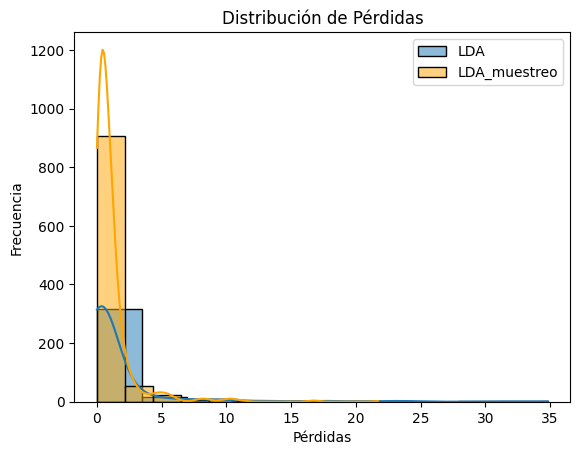

En la gráfica anterior, es posible ver reflejado estos indicadores y se podría afirmar que sus distribuciones son similares, concentrando la mayoría de casos en los valores de pérdida más bajos.

### Análisis comparativo de la caracterización de las distribuciones agregadas de pérdidas (LDA)

**1.	Medidas de tendencia central y dispersión**

* La media de los datos originales es 2.6564, mientras que en los datos muestreados es 1.4713. Esto indica que el muestreo reduce significativamente el valor promedio de las pérdidas.
* La varianza también disminuye considerablemente de 13.0896 en los datos originales a 2.3644 en los datos muestreados, lo que sugiere una menor dispersión en la distribución de pérdidas tras el muestreo.
* La desviación estándar se reduce de 3.6179 a 1.5377, lo que implica menor variabilidad en los datos muestreados.

**2.	Coeficiente de asimetría y curtosis**

Obtenidos con fórmulas estadísticas.

* El coeficiente de asimetría original es 5.3133, mientras que en los datos muestreados es 6.1349, lo que indica una mayor asimetría positiva en la distribución tras el muestreo. Esto sugiere la presencia de eventos de pérdida extrema.
* La curtosis aumenta de 31.7356 en los datos originales a 49.7359 en los datos muestreados, reflejando una distribución más concentrada en torno a la media y con colas más pesadas.

**3.	Errores asociados con la muestra**

* El error asociado con la muestra de los datos originales es 0.0222, mientras que en los datos muestreados es 0.0131, indicando mayor precisión en la estimación estadística tras el muestreo.
* Los intervalos de confianza para la media también reflejan esta precisión mejorada*:

>> **Datos originales:** [2.6343, 2.6786]

>> **Datos muestreados:** [1.4582, 1.4844]

*Entre mayor sea n (número de datos), menor será el error asociado con la muestra.


El análisis de los datos muestreados (n=1000), obtenidos para una confiabilidad del 99.9% según los acuerdos de Basilea, revela que la distribución presenta una estructura de cola larga, lo que indica que la mayoría de las pérdidas están concentradas en valores bajos, pero existe una menor frecuencia de eventos extremos con pérdidas significativamente altas.

El coeficiente de asimetría de 6.1349 indica una asimetría positiva, lo que implica que hay una mayor proporción de eventos de pérdida con valores relativamente bajos, pero también existen valores atípicos de gran magnitud que pueden representar riesgos importantes.

Por otro lado, la curtosis de 49.7359 confirma que la distribución está concentrada en torno a la media, con colas más pronunciadas que las de una distribución normal. Esto significa que, aunque la mayoría de las pérdidas son bajas, hay una probabilidad no despreciable de ocurrencia de eventos de pérdida extrema.


Finalmente, cabe aclarar que el mismo proceso de caracterización se llevo a cabo de igual manera en el archivo de excel adjunto en las hojas (AdmonProcesos y LDA, respectivamente). En general los resultados obtenidos fueron muy similares, a excepción de algunas pequeñas diferencias en unidades en el cálculo de los coeficientes de asimetría y curtosis.